In [1]:
from sklearn import datasets

In [2]:
x,y=datasets.make_classification(n_features=2,n_redundant=0,n_classes=2,random_state=7816)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x[:5]

array([[-2.70996207e-03, -1.55280126e+00],
       [-2.38800326e+00,  4.63428056e-01],
       [ 2.90036243e-01, -2.77185022e+00],
       [-1.57948481e+00,  1.81154677e+00],
       [-1.42556496e+00, -1.25718906e-02]])

In [5]:
y[:5]

array([0, 1, 0, 1, 0])

In [6]:
import seaborn as sns 

Text(0, 0.5, 'Y values')

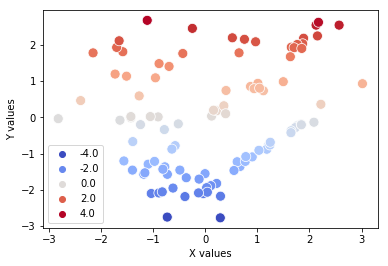

In [7]:
sns.scatterplot(x[:,0],x[:,1],palette="coolwarm",s=100,hue=x[:,1])
plt.xlabel("X values")
plt.ylabel("Y values")

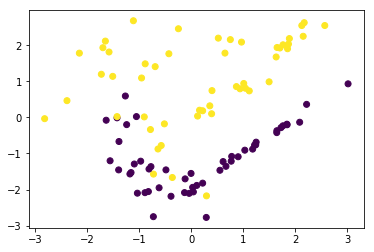

In [8]:
plt.scatter(x[:,0],x[:,1],c=y)

In [9]:
import numpy as np

In [10]:
# Convert the data type into suitable form and convert the target label to either +1 or -1
x=x.astype(np.float32)
y=y*2-1

In [11]:
y

array([-1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
       -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,
        1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [14]:
X_train[:5]

array([[ 0.22020994, -1.8222455 ],
       [ 2.1726243 ,  2.6239777 ],
       [ 0.66845876, -1.3559657 ],
       [-1.2406462 , -0.20070334],
       [ 1.6471438 , -0.36924782]], dtype=float32)

In [15]:
# Using the SVM. Here, The Cv2 lib  is used.
import cv2

In [16]:
svm=cv2.ml.SVM_create()

In [17]:
svm.setKernel(cv2.ml.SVM_LINEAR)

In [18]:
svm.train(X_train,cv2.ml.ROW_SAMPLE,y_train)

True

In [19]:
predict=svm.predict(X_test)

In [20]:
predict[1]

array([[-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.]], dtype=float32)

In [21]:
from sklearn import metrics

In [22]:
metrics.accuracy_score(y_test,predict[1])

0.8787878787878788

In [23]:
x_min,x_max=X_test[:,0].min()-1,X_test[:,0].max()+1
y_min,y_max=X_test[:,1].min()-1,X_test[:,1].max()+1

In [24]:
x_min,x_max

(-2.634350061416626, 3.126577615737915)

In [25]:
y_min,y_max

(-3.1055989265441895, 3.544739007949829)

In [26]:
# Taking the step size
h=0.02
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                 np.arange(y_min,y_max,h))

In [27]:
X_hypo=np.c_[xx.ravel().astype(np.float32),yy.ravel().astype(np.float32)]

In [28]:
# The ravel method changed the n,m  multidimentional array to a single d-array
xx.ravel()

array([-2.63435006, -2.61435006, -2.59435006, ...,  3.08564994,
        3.10564994,  3.12564994])

In [29]:
_,pred=svm.predict(X_hypo)

In [30]:
pred

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)

In [31]:
xx.shape

(333, 289)

In [32]:
pred=pred.reshape(xx.shape)

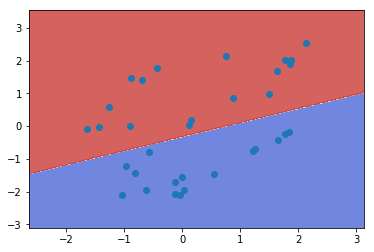

In [33]:
# Plotting the contour and on top plotting the data points to visualize the graph better
plt.contourf(xx,yy,pred,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(X_test[:,0],X_test[:,1])

In [34]:
# Trying out different kernels
svmKernels=[cv2.ml.SVM_LINEAR,cv2.ml.SVM_INTER,cv2.ml.SVM_SIGMOID,cv2.ml.SVM_RBF]

In [36]:
svm=cv2.ml.SVM_create()

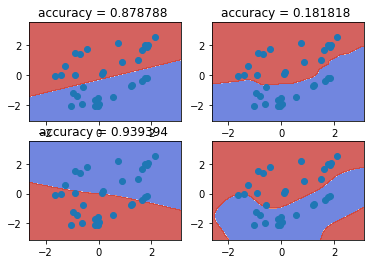

In [46]:
for id1,kernel in enumerate(svmKernels):
    svm.setKernel(kernel)
    svm.train(X_train,cv2.ml.ROW_SAMPLE,y_train)
    _,kernelPred=svm.predict(X_test)
    accuracy=metrics.accuracy_score(y_test,kernelPred)
    plt.title('accuracy = %f ' % accuracy)
    plt.subplot(2,2,id1+1)
    decision_plot(svm,X_test,y_test)

In [40]:
# Creating the  plot function and encapsulating all the necessary things into the function below
def decision_plot(svm,X_test,y_test):
    x_min,x_max=X_test[:,0].min()-1,X_test[:,0].max()+1
    y_min,y_max=X_test[:,1].min()-1,X_test[:,1].max()+1
    h=0.02
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    X_hypo=np.c_[xx.ravel().astype(np.float32),yy.ravel().astype(np.float32)]
    _,pred=svm.predict(X_hypo)
    pred=pred.reshape(xx.shape)
    plt.contourf(xx,yy,pred,cmap=plt.cm.coolwarm,alpha=0.8)
    plt.scatter(X_test[:,0],X_test[:,1])